In [1]:
ls 


 Volume in drive C is SSD
 Volume Serial Number is 4296-F8CF

 Directory of C:\Users\serde\Desktop\data_science_bootcamp2020\Python\matplotlib

08/03/2020  11:15 AM    <DIR>          .
08/03/2020  11:15 AM    <DIR>          ..
08/03/2020  11:13 AM    <DIR>          .ipynb_checkpoints
07/16/2020  11:07 AM           474,837 16 July 2020 notes.ipynb
07/14/2020  02:49 PM               348 AnscombesQuartet.csv
08/03/2020  10:41 AM           579,043 bank.zip
07/14/2020  02:49 PM           367,467 COVID19_line_list_data.csv
07/17/2020  12:00 AM            36,699 matplotlib_example.ipynb
08/01/2020  07:40 PM           112,044 matplotlib_practice.ipynb
08/01/2020  07:19 PM            70,536 NSF_AM_07162020.ipynb
08/01/2020  07:58 PM            56,737 NSF_AM_07202020.ipynb
08/01/2020  09:12 PM            95,917 NSF_AM_07212020.ipynb
08/01/2020  09:48 PM            22,103 NSF_AM_07222020.ipynb
08/02/2020  03:01 PM           135,277 NSF_AM_07232020.ipynb
08/03/2020  11:15 AM               569 NSF_

In [42]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC

In [8]:
#read the bank.csv into a dataframe using the following code:
with zipfile.ZipFile('bank.zip') as z:
    with z.open('bank.csv') as f:
        df = pd.read_csv(f, sep=';')

In [9]:
#Check the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
#Extract the dataframe column labeled 'y' as your Y variable using list comprehension
y = np.array([1 if x=='yes' else 0 for x in df['y']])

In [14]:
#Use the remaining columns into your x data, Convert the categorical data into numerical using get_dummies and then into a numpy array
x = pd.get_dummies(df.loc[:, 'age' : 'poutcome' : 1]).to_numpy()

In [16]:
#Values of y
y


array([0, 0, 0, ..., 0, 0, 0])

In [17]:
#Values of x
x

array([[  30, 1787,   19, ...,    0,    0,    1],
       [  33, 4789,   11, ...,    0,    0,    0],
       [  35, 1350,   16, ...,    0,    0,    0],
       ...,
       [  57,  295,   19, ...,    0,    0,    1],
       [  28, 1137,    6, ...,    1,    0,    0],
       [  44, 1136,    3, ...,    1,    0,    0]], dtype=int64)

In [40]:
#Scale the data
s = MinMaxScaler()
s.fit(x)
x_data = s.transform(x)
x_data

array([[0.16176471, 0.06845546, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.10875022, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.06258976, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55882353, 0.04842888, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.13235294, 0.05973074, 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.36764706, 0.05971732, 0.06666667, ..., 1.        , 0.        ,
        0.        ]])

In [58]:
#Determine the accuracy and make an ROC plot
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y)
#LR
mymodel = LR()
mymodel.fit(xtrain,ytrain)
ypred = mymodel.predict(xtest)
accuracy = accuracy_score(ypred,ytest)
probability = mymodel.predict_proba(xtest)[:,1]
#SVC
SVM = SVC(kernel='linear')
SVM.fit(xtrain,ytrain)
y_svc_pred = SVM.predict(xtest)
svc_probability = SVM.score(xtest,ytest)
print("SVC Prediction shape: ", y_svc_pred.shape,"\nSVC Prediction: ", y_svc_pred, "\nSVC Score: ", svc_probability)

FPR,TPR,THRESHOLDS = roc_curve(ytest, probability)

SVC Prediction shape:  (1131,) 
SVC Prediction:  [0 1 0 ... 0 0 0] 
SVC Score:  0.896551724137931


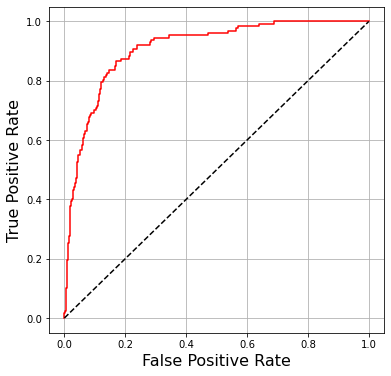

In [59]:
fig, ax = plt.subplots(1,1)
ax.plot(FPR,TPR, c='red')
ax.plot([0,1],[0,1], c='k',ls='--')
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.grid()
fig.set_size_inches(6,6)
plt.show()